# Vehicle Detection using Histogram of Gradients and Linear SVM classifier

    Different parts of the project 

1. Feature extraction and Classification - hog_classify.py
2. Helper Functions - lesson_functions.py
3. Heat Map - heat_map.py
4. Box tracking of objects for video implementation - Box_Check.py
5. Running the video and the pipeline - search_and_classify.py

   Step1 of the Vehicle Detection Pipeline 

1. Feature Extraction - Different features were extracted from each image 
    a. Binned Color Features - This was achieved by using the bin_spatial function which resized the image and 
      captured the color information of the image even at low resolution.
    b. Histogram of Colors - A histogram of each color channel was created with default value of 32 bins, thereby 
    leading to 96 features for each image in the training data set.
    c. HOG - Histogram of Gradients was calculated for the color space specified with pix_per_cell=8 and cell_per_block =2 with 9 orientations. This was the most compute intesive part of the feature extraction. 
    
All these features were combined as the feature set for the linear SVM classifier.

### RUBRIC POINT 1 - HOG feature extraction from the training images 

The below segment talks of the implementation of the different feature extraction functions including the HOG feature extraction.

In [7]:
# Feature extraction functions 

import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
import numpy as np
import cv2
from skimage.feature import hog
import glob 

# Spatial Binning Function

# Define a function to compute binned color features
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel()
    # Return the feature vector
    return features

# Plot the result of running this function on test images 
images = glob.glob('test_images/*.jpg')

print("Subset of Color binning features from the test images")

for image_name in images:
    image = mpimg.imread(image_name)
    features = bin_spatial(image)
    print(features[0:20])


Subset of Color binning features from the test images
[114 156 194 117 156 197 115 154 195 115 154 197 112 155 200 106 151 193
 106 149]
[108 154 194 112 151 194 109 151 193 109 151 193 106 151 192 120 138 170
  88  75]
[ 0  0  0 12 10  0 20 24  9 41 38 31  7  8  1 35 31 22  3 12]
[ 99 150 197  96 151 197 100 151 194  96 150 194  95 148 200  96 150 194
  93 146]
[118 165 201 115 163 196 120 164 199 117 163 199 119 164 203 114 162 200
 113 161]
[ 98 139 183  90 139 180  97 138 184  92 139 183  94 138 183  93 137 182
  93 138]


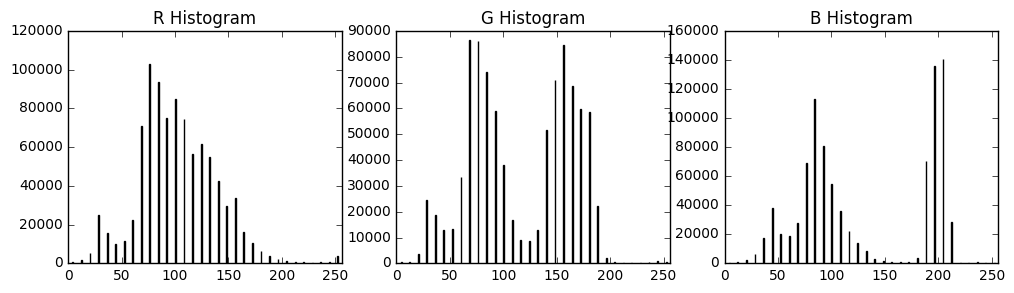

In [13]:
def color_hist(image, bins=32, range=(0, 256)):

    rhist = np.histogram(image[:,:,0].ravel(), bins=32, range=(0, 256))
    ghist = np.histogram(image[:,:,1], bins=32, range=(0, 256))
    bhist = np.histogram(image[:,:,2], bins=32, range=(0, 256))

    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2

    # Concatenate the features together
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))

    return rhist, ghist, bhist, bin_centers, hist_features

# Read in the test image again 
image = mpimg.imread(images[0])
rhist, ghist, bhist, bin_centers, hist_features = color_hist(image)

# Plot a figure with all three bar charts
fig = plt.figure(figsize=(12,3))
plt.subplot(131)
plt.bar(bin_centers, rhist[0])
plt.xlim(0, 256)
plt.title('R Histogram')
plt.subplot(132)
plt.bar(bin_centers, ghist[0])
plt.xlim(0, 256)
plt.title('G Histogram')
plt.subplot(133)
plt.bar(bin_centers, bhist[0])
plt.xlim(0, 256)
plt.title('B Histogram')

plt.show()



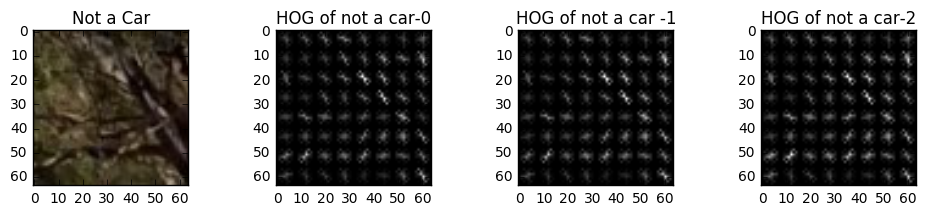

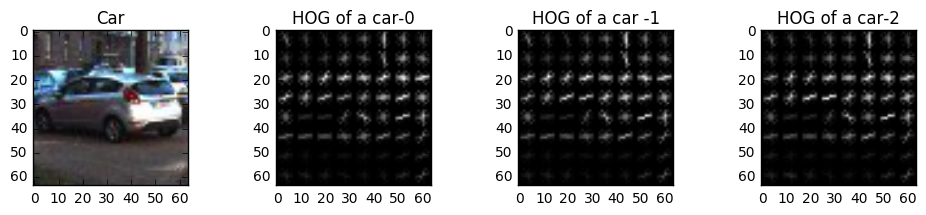

In [29]:
# Function that is used to get the HOG features 

# Define a function to return HOG features and visualization
def get_hog_features(img, orient=9, pix_per_cell=8, cell_per_block=2,
                     vis=True, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient,
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  transform_sqrt=True,
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:
        features = hog(img, orientations=orient,
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block),
                       transform_sqrt=True,
                       visualise=vis, feature_vector=feature_vec)
        return features

# Run HOG on a car and a notcar image and compare the results 
notcar = '/home/srikant/Documents/self_driving_car/vehicle_detection/non-vehicles_smallset/notcars1/extra46.jpeg'
notcar_image = mpimg.imread(notcar)
feat,hog_notcar_image0 = get_hog_features(notcar_image[:,:,0])
feat,hog_notcar_image1 = get_hog_features(notcar_image[:,:,1])
feat,hog_notcar_image2 = get_hog_features(notcar_image[:,:,2])
fig = plt.figure(figsize=(12,2))
plt.subplot(141)
plt.imshow(notcar_image)
plt.title('Not a Car')
plt.subplot(142)
plt.imshow(hog_notcar_image0,cmap='gray')
plt.title('HOG of not a car-0')
plt.subplot(143)
plt.imshow(hog_notcar_image1,cmap='gray')
plt.title('HOG of not a car -1')
plt.subplot(144)
plt.imshow(hog_notcar_image2,cmap='gray')
plt.title('HOG of not a car-2')

car = '/home/srikant/Documents/self_driving_car/vehicle_detection/vehicles_smallset/cars1/41.jpeg'
car_image = mpimg.imread(car)
feat,hog_car_image0 = get_hog_features(car_image[:,:,0])
feat,hog_car_image1 = get_hog_features(car_image[:,:,1])
feat,hog_car_image2 = get_hog_features(car_image[:,:,2])
fig = plt.figure(figsize=(12,2))
plt.subplot(141)
plt.imshow(car_image)
plt.title('Car')
plt.subplot(142)
plt.imshow(hog_car_image0,cmap='gray')
plt.title('HOG of a car-0')
plt.subplot(143)
plt.imshow(hog_car_image1,cmap='gray')
plt.title('HOG of a car -1')
plt.subplot(144)
plt.imshow(hog_car_image2,cmap='gray')
plt.title('HOG of a car-2')

plt.show()

### RUBRIC POINT 2 - HOG parameters and how they were chosen 

1. Orientation - I changed the orientation from the value of 9 provided in the Udacity lesson code to 15 but I did not see a whole lot of improvement in the Accuracy of the Classifier. However increasing the number of orientations increased compute time. Hence I finalized the value to be 9 
2. pix_per-cell = 8. I reduced the pix_per_cell to 4 and while I did see a slight increase in the Accuracy of the test data, this was at the cost of much higher compute time for individual images. Therefore I decided to stick with 8.
3. cells_per_block = 2 I did not play around with this too much. 

For the other feature selection criteria - I stuck to images sizes of 32x32 for the spatial binning as this led to reduction in feature size withouht losing too much information from the images. 
The number of bins for the histogram of color features was 32 and the range was from (0,256)

#### RUBRIC POINT 3 - Training the classifier using the features 

The high level algorithm is as follows 

1. Extract features from each training image ( 64 x 64 .png files which are either car or not car )
2. Run a Linear Support Vector Machine Classifer 
3. Save the SVC and the calibrated classifier (its use will be explained in future classes)

The classifier is implemented in the hog_classify.py section and was used on the vehicle and non-vehicle database that was locally stored. Important parts of the code snippet are run in the next code block.

In [30]:
# Running the classifer - The code is copied from hog_classify.py  

import numpy as np
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib
from sklearn.calibration import CalibratedClassifierCV
# for scikit-learn >= 0.18 use:
from sklearn.model_selection import train_test_split

from lesson_functions import get_hog_features, extract_features


# Read in car and non-car images
cars = glob.glob('/home/srikant/Documents/self_driving_car/vehicle_detection/vehicles/*/*.png')
notcars = glob.glob('/home/srikant/Documents/self_driving_car/vehicle_detection/non-vehicles/*/*.png')


# Print details of the number of "car" and "not car" images
print("The number of car images: ", len(cars))
print("The number of notcar images: ", len(notcars))

### HOG feature parameters that need to be set
colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"

t=time.time()
car_features = extract_features(cars, colorspace, orient=orient,
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                        hog_channel=hog_channel)
notcar_features = extract_features(notcars, colorspace, orient=orient,
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                        hog_channel=hog_channel)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract HOG features...')
# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC
svc = LinearSVC()
clf = CalibratedClassifierCV(svc)
# Check the training time for the SVC
t=time.time()
clf.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(clf.score(X_test, y_test), 4))
print('Train Accuracy of SVC = ', round(clf.score(X_train, y_train), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', clf.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

The number of car images:  8792
The number of notcar images:  8968
85.45 Seconds to extract HOG features...
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 8460
22.57 Seconds to train SVC...
Test Accuracy of SVC =  0.993
Train Accuracy of SVC =  1.0
My SVC predicts:  [ 0.  1.  1.  0.  1.  0.  0.  0.  0.  0.]
For these 10 labels:  [ 0.  1.  1.  0.  1.  0.  0.  0.  0.  0.]
0.00258 Seconds to predict 10 labels with SVC


#### RUBRIC POINT 4 - Sliding window implementation

The high level algorithm followed is

1. Determine window size, start and end points, overlap percentage 
2. Run the sliding window function to calculate the sub-images on which the classifier needs to be run. 
3. Provide that to the classifier and append to a list with positive matches. 
4. See if that is the last window size, otherwise go back to step 1

Important parameters that were chosen 

1. Window size - (64,64) --> From y_start = 360 to y_stop = 480
   (128,128) --> From y_start = 360 to y_stop = 600
   (256,256) --> From y_start = 360 to y_stop = 720 
2. Start and End points - Mentioned above for each sliding window size
3. Overlap percentage - 90% to get very good results on the video.

Details on why these values were chosen are now provided 

Window Size -- Although the video output was of pretty high quality with window sizes starting at (128,128), two reasons led me to change these values 
    1. There was a "dead zone" for 3 seconds in the video when the white car moves away when the car stops being tracked .. this led me to believe that I need smaller windows as well to continue tracking objects that started to move away.
    2. The classification images were (64,64) and so it would be good to classify for images of those sizes.
    
Overlap Percentages - I started off with 0.5 overlap fraction and while this gave reasonably good result when I ran them on the images, this value was too small to provide persistence in the bounding boxes in the video. 
The bounding boxes seemed to flicker and blink a lot and did not seem very nice. 

I kept increasing the overlap percentages till I got a pretty good reduction in the flickering and blinking of the bounding boxes for the objects being tracked.


The next code block contains code and addtional details. 

There are two main functions used for the sliding_window 

1. The basic sliding window function based on the Udacity implementation in lesson_functions.py - slide_window()
2. Slide the window and classify for each sub-window in lesson_functions.py - full_sliding_window_search

In [31]:
# The slide and search implementatoin is provided next 

def full_sliding_window_search(img,clf,scaler):
    """Function utilizes slide window of different sizes in the bottom half of the image.
    ypix 360-480 --> Smallest size of window  --> 64x 64
    ypix 360-600 --> Bigger size of window   --> 128x 128
    ypix 360-720 --> largest size of window  --> 256 x 256
    If this does not work well - make it more granular
    """
    # Keep track of all the windows where a car was found
    on_windows = []
    ystep = 120
    start_window = 64
    # Find all
    for i in range(2):
        xy_window = (start_window*(2**i),start_window*(2**i))
        windows = slide_window(img,x_start_stop=[int(img.shape[1]/2),int(img.shape[1])]
                               ,y_start_stop=[360,480 + ystep*i],
                               xy_window=xy_window,xy_overlap=(0.9,0.9))
        on_windows += search_windows(img,windows,clf,scaler)
    return on_windows

In [37]:
# Test on a few of the test images -- just the sliding window 
import pickle
from lesson_functions import * 
svc = joblib.load('svc.pickle')
scaler = joblib.load('scaler.pickle')
clf = joblib.load('calibrated_classifier.pickle')
print("The classifier  and the scaler have been loaded successfully ..")

# Plot the result of running this function on test images 
images = glob.glob('test_images/*.jpg')
print(images)
i=1
for image_name in images:
    #Step 1 - Load the image 
    image = cv2.imread(image_name)
    #Step 2 - Slide and Classify for each image 
    bbox = full_sliding_window_search(image,clf,scaler)
    #Step 3 - Draw the bboxes
    image_copy = draw_boxes(image, bbox)
    #Save the image 
    filename = 'output_images/test' + str(i) + '.jpg'
    cv2.imwrite(filename,image_copy)
    i +=1

The classifier  and the scaler have been loaded successfully ..
['test_images/test3.jpg', 'test_images/test6.jpg', 'test_images/test5.jpg', 'test_images/test1.jpg', 'test_images/test4.jpg', 'test_images/test2.jpg']


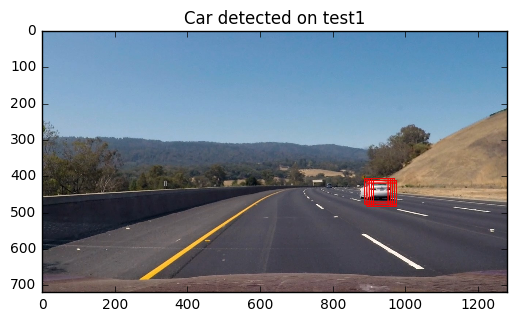

In [46]:
plt_img = mpimg.imread('output_images/test1.jpg')
plt.imshow(plt_img)
plt.title('Car detected on test1')
plt.show()



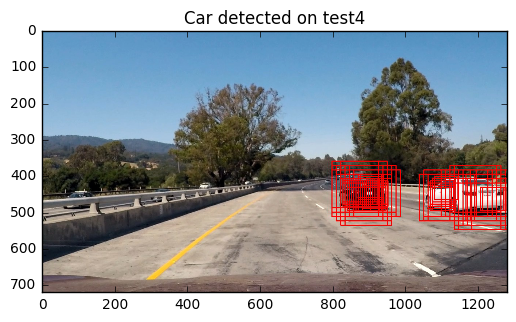

In [47]:
plt_img = mpimg.imread('output_images/test4.jpg')
plt.imshow(plt_img)
plt.title('Car detected on test4')
plt.show()

### RUBRIC POINT 5 - Improvement to reduce false positives and more reliable car detections

Examples images are already provided above and in the output_images folder on the indentification of cars using the sliding window search. 

There are additional steps which are performed to provide good results on the video which will be briefly discussed here and I will provide additional details in the Video Implementation section when necessary.

1. Dealing with False positives - There were a lot of false positives initially and the confidence level of the cars was > 0.9 in almost all test images. 
Instead of just looking for a predicition of 1, only those sub_windows which had a predicted probability > 0.8 were accepted as real cars. ( The value of 0.8 was used mainly based on my understanding from the forum discussions and I would like to acknowledge that).
2. Which Color Space to Choose - Although all Color spaces (apart from RGB because I did not try RGB) gave excellent results in the classifier, I decided to go with YCrCb based on my results with test videos clips that I had created. I got pretty good results with YUV and HSV (HOG on all channels) as well.
3. I used cv2.imread as there was a mix of .png and .jpg images for classification and training. 


### RUBRIC POINT 6 - Video Implementation 

The pipeline for video implementation is as follows 

Step 1 - Implement the Sliding Window and Search Classify discussed upto now.
Step 2 - Create Heat Map with a intensity threshold ( typ 2-3) to narrow down the number of bounding boxes and to get rid of false positives  
step 3 - Detect if the bounding boxes is in the vicinity of the earlier bounding boxes
Step 4 - Merge the bounding boxes if there is overlap as one image. 

In [50]:
#### Video Pipeline Implementation

from lesson_functions import *
import cv2
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
import glob
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.externals import joblib
from heat_map import heat_map
from moviepy.editor import VideoFileClip
from Box_Check import Box_Check

hm = heat_map()
images = glob.glob('test_images/*.jpg')
i=1
for image_name in images:
    # Read the image in 
    img = cv2.imread(image_name)
    
    windows = full_sliding_window_search(img, clf, scaler)

    updated_windows = hm.add_heat(windows)
    
    hm.apply_threshold()

    filename = 'output_images/heatmap' + str(i) + '.jpg'
    mpimg.imsave(filename,hm.heatmap,cmap='gray')
    i +=1


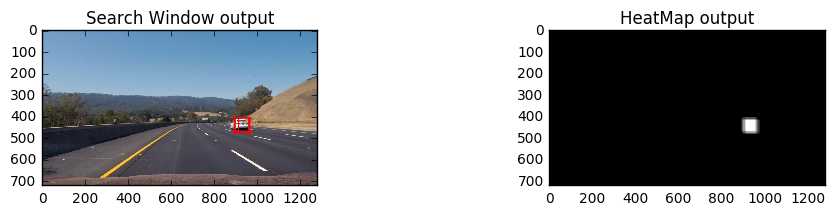

In [57]:
## Plot the sliding search window output and the corresponding search window on that - 
test1 = mpimg.imread('output_images/test1.jpg')
heatmap1 = mpimg.imread('output_images/heatmap1.jpg')
fig = plt.figure(figsize=(12,2))
plt.subplot(121)
plt.imshow(test1)
plt.title('Search Window output')
plt.subplot(122)
plt.imshow(heatmap1)
plt.title('HeatMap output')

plt.show()


In [62]:
from lesson_functions import *
images = glob.glob('test_images/*.jpg')
i=1
for image_name in images:
    # Read the image in 
    img = cv2.imread(image_name)
    windows = full_sliding_window_search(img, clf, scaler)
    updated_windows = hm.check_bbox(windows)
    img_copy = draw_boxes(img, updated_windows)
    filename = 'output_images/final' + str(i) + '.jpg'
    cv2.imwrite(filename,img_copy)
    i +=1

Finished this frame ...
Finished this frame ...
Finished this frame ...
Finished this frame ...
Finished this frame ...
Finished this frame ...


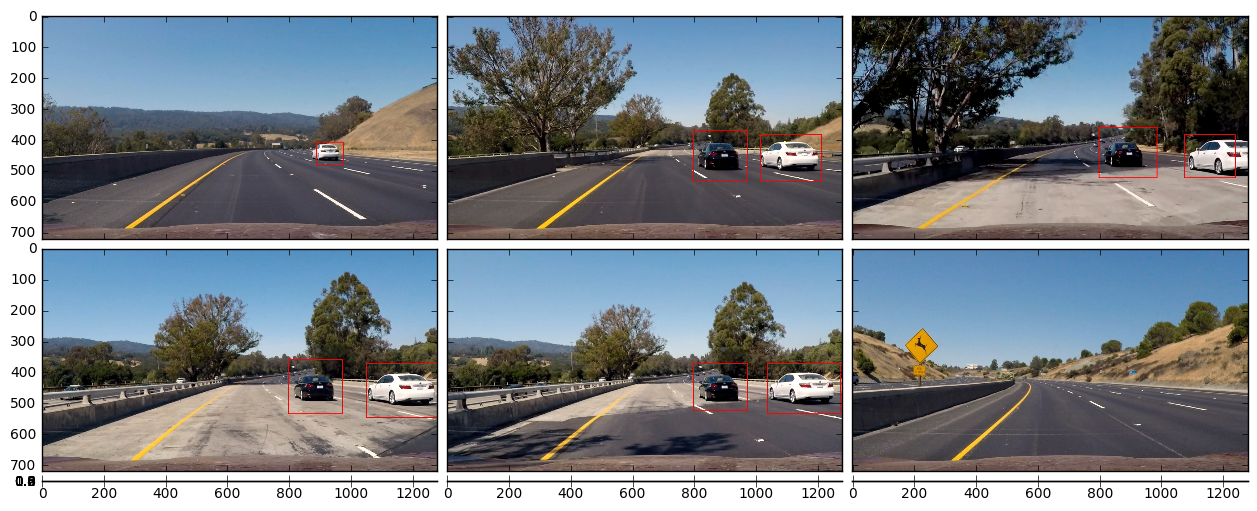

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(1, (48, 6))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for i in range(6):
    filename = 'output_images/final' + str(i+1) + '.jpg'
    img = mpimg.imread(filename)
    grid[i].imshow(img)  

plt.show()

### RUBRIC POINT 7 - Method to Combine Overlapping bounding boxes 

The following strategy was followed once the heatmap was created 

1. Find the co-ordinates of the bbox using scipy.ndimage.measurements labels function was created which provides a bounding box based on the heat map generated.
2. This then leads to a narrowed down version of the number of bounding boxes 
3. The bounding boxes are now passed to the Box_Check object which matches boxes found to cars that are already being tracked. 

The high level algorithm is below and you can look at Box_Check.py for Implementation details 

1. If the new bounding box center is some value k away from the center of a box already being tracked, it is tracking the same box. 
2. If there is significant overlap between this box and a pre-exisiting box, merge the boundary of the two to make it larger ( this was required to significantly reduce jittering of the image). 
3. If you see the same box for more than 5 images - draw it on the image ( This helps greatly in avoiding false positives and you can almost see none in the video).
4. If you do not see a car for more than 5 images - then do the following
    a. stop drawing it on the image
    b. stop tracking the car/box
    c. Remove it from the list of tracked cars. 
    
 
 The video after it goes through the pipeline is attached in the project submission.
 
 Final P5 project video - project_video_output_P5.mp4
 
 Pipeline run on the P4 pipeline outpt (Advanced Lane Finding) - project_video_output_combined.mp4
 

In [70]:
# Define the pipeline for the image

# Create the necessary objects
hm = heat_map()
boxcheck = Box_Check()

# This does not work for images because objects need to be seen in 5 images before they are drawn - this is a
# measure to weed out false positives 

# Pipeline code is just shown -- works well on Video but not on single images 
def image_pipeline(img):
    # Perform sliding window search and classify on sub images for each image in the video
    windows = full_sliding_window_search(img, clf, scaler)
    # Provide the box co-ordinates to generate a heatmap and reduce the number of false positives
    updated_windows = hm.check_bbox(windows)
    # Detect, Track,Merge and Remove boxes
    boxcheck.detect(updated_windows)
    # Draw the boxes determined to mark cars using the original Udacity Function draw_bbox
    window_img = boxcheck.draw_bbox(img)

    return window_img


### PROJECT RUBRIC 8

#### Issues faced with Implementation - There were a few issues with implementation 
1. Lot of false positives in the video which I was unable to re-create in the test images. I overcame this by clipping the video into small chunks and testing while dumping out images. 
2. Run time - The run time of each image is pretty long considering the features are based on HOG for all 3 color channels. This is also a problem with the image pipeline that I would further like to improve

#### Places where the implementation might break - 
1. While deciding on the right smallest window size for the sliding window - the weak point of the implementation was the fact that when it moved from the dark road to a slightly lighter road .. the classifier stops being able to detect the white car. This led to change the window size to (64,64) instead of something larger. 
I would imagine that in areas where the lighting conditions change drastically ( covered by trees to open air for example), this pipeline might not be able to detect and track objects accurately.

#### Things to improve in the project - I wanted to list out a few things that I could not get to because of schedule concerns 
1. Implementing "Run HOG once and get features based on the sliding window you are in" - This was listed in the Tips and Tricks and I tried to implement it in my sliding window search function. However, I was not able to get hold of even a good resource to understand how things work in the function when feature_vec=False.
As a result my pipeline is pretty slow. Which bring me to the next point ...
2. Make it fast -- I tried using only one HOG channel ( saturation in HSV and HLS) and this led to decent but not satisfactory results albeit reducing runtime to 1/4th the total time. 
3. Add depth information of some sort -- In certain images, the pipeline accurately detects "cars" which are in the opposite lane but the bounding boxes make it seem like the car is right in front of the camera which can be very misleading. 

That being said, I am very happy with my pipeline results and would love to hear some feedback :)